In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Grid-world dimensions
grid_size = 3
gamma = 0.9  # Discount factor
alpha = 0.1  # Learning rate

In [15]:
# Initialize state-value function V(s)
V = np.zeros((grid_size, grid_size))

In [16]:
# Define the environment
actions = ['up', 'down', 'left', 'right']
rewards = np.zeros((grid_size, grid_size))
rewards[-1, -1] = 1  # Goal state reward

In [17]:
# Transition function
def step(state, action):
    x, y = state
    if action == 'up':
        x = max(0, x - 1)
    elif action == 'down':
        x = min(grid_size - 1, x + 1)
    elif action == 'left':
        y = max(0, y - 1)
    elif action == 'right':
        y = min(grid_size - 1, y + 1)
    return (x, y), rewards[x, y]

In [18]:
# Simulation parameters
state = (0, 0)  # Start state
episodes = 100  # Number of episodes
snapshots = []  # To store V(s) for visualization

In [19]:
# Run simulation and capture snapshots of V(s)
for ep in range(episodes):
    if state == (grid_size - 1, grid_size - 1):  # Reset to start if at goal
        state = (0, 0)
        continue
    
    action = np.random.choice(actions)
    next_state, reward = step(state, action)
    
    # Update state-value function using bootstrapping
    td_target = reward + gamma * V[next_state]
    td_error = td_target - V[state]
    V[state] += alpha * td_error
    
    state = next_state
    
    if ep % 20 == 0:  # Capture snapshots every 20 episodes
        snapshots.append(V.copy())

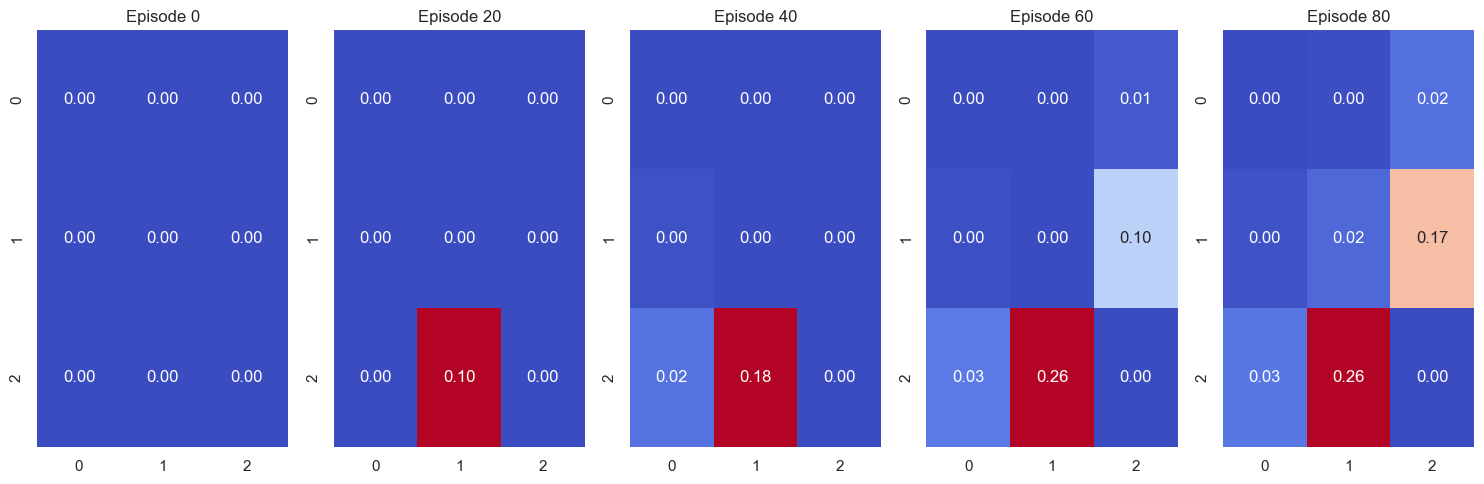

In [20]:
# Visualization: Plot the snapshots
fig, axes = plt.subplots(1, len(snapshots), figsize=(15, 5))
sns.set(style="white")
for i, ax in enumerate(axes):
    sns.heatmap(snapshots[i], annot=True, fmt=".2f", cmap="coolwarm", cbar=False, ax=ax)
    ax.set_title(f"Episode {i * 20}")

plt.tight_layout()
plt.show()